In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Add_sales_data_2018.csv')
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [3]:
df.shape

(205, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [5]:
df.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [6]:
df.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


# Checking whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

<AxesSubplot:>

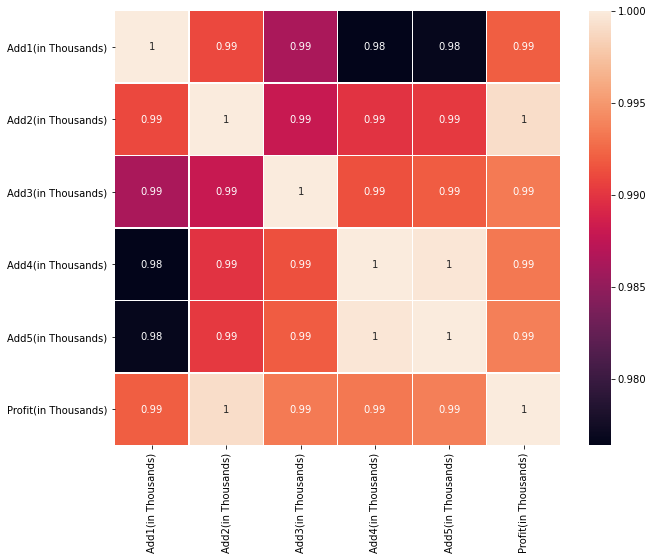

In [7]:
corrmatrix=df.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix,annot=True,cmap='rocket',linewidth=.2)

Conclusion: As all the correlation values of Adds are greater than 0.99 with the profit this indicates that advertisement has a positive impact on profit 


# Building a regression model to predict the profit from the given data without removing variables

In [8]:
y=df['Profit(in Thousands)']
X=df.drop(['Date','Profit(in Thousands)'],axis=1)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.25)

In [10]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
pred=model.predict(X_test)
print(pred,y_test)

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788 5038.222 5491.792 5019.997 4647.356 4486.38  4435.174 5300.437
 5425.19  4482.183 4193.095 6062.457] 15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.

In [11]:
from sklearn.metrics import mean_squared_error
print("MSE is",mean_squared_error(y_test,pred))

MSE is 6.999220567756388e-25


In [12]:
lr.intercept_

1.8189894035458565e-12

In [13]:
lr.coef_

array([ 1.  , 12.38,  3.5 ,  1.  ,  0.9 ])

In [14]:
from sklearn.metrics import r2_score
r2_score(pred,y_test)


1.0

Since MSE = 6.999220567756388e-25 which is very small  and R^2 =1.0 which indicate that regression is of good fit and can be used to future profits according to the value of Add.The regression equation is


Profit=1.8189894035458565e-12+Add1(in Thousands)+12.38*Add2(in Thousands)+3.5*Add3(in Thousands)+Add4(in Thousands)+0.9*Add5(in Thousands)


Which indicate that most contributing factor to the profit is Add2 followed by Add3 That is 1000 Rupees increase in Add2 results in 12380 increase in profit

# Predict the profit generated by the company

In [ ]:
X_new=[[290,312,309,298,320]]
y_pred=lr.predict(X_new)

In [16]:
y_pred

array([5820.06])

# Building a regression model to predict the profit from the given data with removing variables

# Due to the following reasons we remove the variales 'Add1(in Thousands)' and 'Add4(in Thousands)':
    1.Add2 has the highest correlation of 0.99145 with profit so we keep the variable;
    2.Add1 is removed because it is the highest correlated variable with the Add2 and also least correlated with profit
    3.The second least correlated variable with profit is Add4 and Add4 is the highest correlation with Add5 so we remove Add4

In [17]:
X=df.drop(['Profit(in Thousands)','Add1(in Thousands)','Add4(in Thousands)','Date'],axis=1)


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.25)
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)

In [19]:
pred=model.predict(X_test)
print(pred,y_test)

[4151.76671997 4448.0445342  5126.97823289 4904.52900127 5005.75346905
 4624.05632513 5383.78149115 5328.30582999 5171.61679771 5958.3826979
 5780.45792608 4998.8029751  5075.68168267 5780.93629769 4933.50123712
 5066.28184908 4190.08608203 5033.80773933 5008.99691214 5131.96372371
 5146.10943042 5425.38672474 4570.42894869 4595.54858545 4437.8255951
 4175.59205944 5612.43299019 5665.71412072 4649.81117716 5720.12204648
 5002.78956017 5181.84257468 5017.20878449 5543.26966362 5014.76077521
 5034.11403247 5107.17080206 4757.57578758 4605.88340994 4927.08093377
 5255.58419419 5040.02604461 5490.32057514 5021.10307872 4645.3099003
 4487.30447631 4431.73072094 5304.12999662 5427.40554431 4479.28604
 4190.61748138 6060.54458861] 15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     419

In [20]:
from sklearn.metrics import mean_squared_error
print("MSE is",mean_squared_error(y_test,pred))

MSE is 5.726949753833067


In [21]:
lr.intercept_

-3.1805342615016343

In [22]:
lr.coef_

array([13.33298986,  4.23029742,  1.22517258])

In [23]:
from sklearn.metrics import r2_score
r2_score(pred,y_test)

0.9999733852650377

When we remove Add1 and Add4 the regression coefficient of remaining variables increased from 12.38 to 13.332 for Add2,3.5 to 4.23 for Add3 and .9 to 1.225 which indicates that the profit of the companies can be increased if we spent the amount more on Add2 and Add3 
In other words if we distribute the amount spend for Add1 and Add4 to Add2 and Add3 propotionally the profit will have a propotional increase
Herre we have the regresion equation

-3.1805342615016343+ 13.33298986*Add2(in Thousands)+ 4.23029742*Add3(in Thousands)+ 1.22517258*Add5(in Thousands)





# Predict the profit generated by the company

In [ ]:
X_new=[[312,309,320]]
y_pred=lr.predict(X_new)


In [25]:
y_pred

array([5855.92943221])